# Analisando o bot

Este jupyter-notebook vai auxiliar na análise de um RASA bot.

## Instalação

### Configurando jupyter

In [12]:
%matplotlib inline

import logging, io, json, warnings
logging.basicConfig(level="INFO")
warnings.filterwarnings('ignore')

def pprint(o):
    # small helper to make dict dumps a bit prettier
    print(json.dumps(o, indent=2))

### Instalação do Rasa


Verificando versões:

In [13]:
import rasa_nlu
import spacy

print("rasa_nlu: {}".format(rasa_nlu.__version__))
print("Loading spaCy language model...")
print(spacy.load("pt")("Olá Mundo!"))

rasa_nlu: 0.13.7
Loading spaCy language model...
Olá Mundo!


### Treinando o modelo do Rasa NLU

Na celula abaixo todas as intents na pasta `../data/intents/` serão utilizadas para gerar os gráficos de avaliação do bot.

Ela irá treinar o modelo e executar a avaliação que pode ser verificada na saída da célula abaixo.

INFO:rasa_nlu.training_data.loading:Training data format of ../data/intents/geral.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 118 (6 distinct intents)
	- Found intents: 'afirmar_curiosidades', 'cumprimentar', 'negar', 'afirmar_projeto', 'afirmar', 'o_que_eh'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.training_data.loading:Training data format of ../data/intents/curiosidades.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 167 (8 distinct intents)
	- Found intents: 'curiosidades_elegibilidade_de_empresa_para_beneficios', 'curiosidades_beneficios_incentivo_projetos_culturais', 'curiosidades_receber_incetivo_de_parentes', 'curiosidades_quantidade_projetos', 'curiosidades_lei_rouanet_elegibilidade', 'curiosidades_lei_rouanet_denuncia', 'curiosidades_deducao_imposto_de_renda_incentivador', 'curiosidades_lei_rouanet_arrecadamento'
	- entity examples: 0 (0 distinct 

Epochs:  43%|████▎     | 129/300 [00:04<00:05, 33.57it/s, loss=0.098, acc=0.996]


Epochs:  68%|██████▊   | 204/300 [00:07<00:03, 30.20it/s, loss=0.060, acc=0.996]


Epochs:  95%|█████████▍| 284/300 [00:09<00:00, 33.25it/s, loss=0.050, acc=0.996]


Epochs: 100%|██████████| 300/300 [00:10<00:00, 33.88it/s, loss=0.045, acc=0.996]
INFO:rasa_nlu.classifiers.embedding_intent_classifier:Finished training embedding policy, loss=0.045, train accuracy=0.996
INFO:rasa_nlu.model:Finished training component.
INFO:rasa_nlu.model:Successfully saved model into '/home/jovyan/work/lab/models/nlu/default/current'
INFO:tensorflow:Restoring parameters from /home/jovyan/work/lab/./models/nlu/default/current/intent_classifier_tensorflow_embedding.ckpt
INFO:rasa_nlu.training_data.loading:Training data format of ../data/intents/geral.md is md
INFO:rasa_nlu.training_data.training_data:Training data stats: 
	- intent examples: 118 (6 distinct intents)
	- Found intents: 'afirmar_curiosidades', 'cumprimentar', 'negar', 'afirmar_projeto', 'afirmar', 'o_que_eh'
	- entity examples: 0 (0 distinct entities)
	- found entities: 

INFO:rasa_nlu.training_data.loading:Training data format of ../data/intents/curiosidades.md is md
INFO:rasa_nlu.training_data.training_d

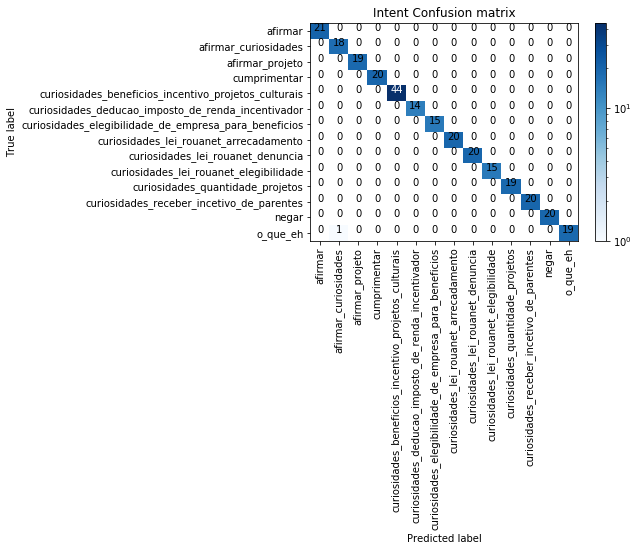

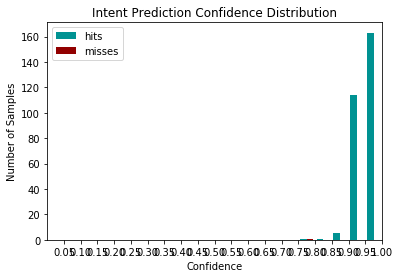

INFO:rasa_nlu.evaluate:Entity evaluation results:
INFO:rasa_nlu.evaluate:Evaluation for entity extractor: ner_crf 
INFO:rasa_nlu.evaluate:F1-Score:  1.0
INFO:rasa_nlu.evaluate:Precision: 1.0
INFO:rasa_nlu.evaluate:Accuracy:  1.0
INFO:rasa_nlu.evaluate:Classification report: 
              precision    recall  f1-score   support

   no_entity       1.00      1.00      1.00      1395

   micro avg       1.00      1.00      1.00      1395
   macro avg       1.00      1.00      1.00      1395
weighted avg       1.00      1.00      1.00      1395



In [131]:
import os

from rasa_nlu.training_data import load_data
from rasa_nlu.model import Trainer
from rasa_nlu import config


intents_directory = '../data/intents/'

intents = {}

for intent_file in os.listdir(intents_directory):
    intent_file_path = os.path.join(intents_directory, intent_file)

    intents[intent_file] = {}

    intent_list = []
    intent_name = None

    with open(intent_file_path) as f:
        lines = f.readlines()

        for line in lines:
            line = line.strip()

            if line.startswith('##'):
                if intent_name is not None:
                    intents[intent_file][intent_name] = intent_list
                intent_name = line.replace('## intent:', '') 
                intent_list = []

            elif line.startswith('- '):
                intent_list.append(line.replace('- ', ''))


# loading the nlu training samples
training_data = load_data(intents_directory)

# trainer to educate our pipeline
trainer = Trainer(config.load("../config.yml"))

# train the model!
interpreter = trainer.train(training_data)

# store it for future use
model_directory = trainer.persist("./models/nlu", fixed_model_name="current")

from rasa_nlu.evaluate import run_evaluation
run_evaluation('../data/intents/', model_directory)

### Avaliação do modelo de NLU treinado

`Caso queira testar mensagens específicas mande a mensagem na célula seguinte`

Quando quiser parar o teste diga **pare**

In [158]:
pprint(interpreter.parse('o que é salic'))

{
  "intent": {
    "name": "o_que_eh",
    "confidence": 0.8716206550598145
  },
  "entities": [],
  "intent_ranking": [
    {
      "name": "o_que_eh",
      "confidence": 0.8716206550598145
    },
    {
      "name": "curiosidades_beneficios_incentivo_projetos_culturais",
      "confidence": 0.35354292392730713
    },
    {
      "name": "afirmar_curiosidades",
      "confidence": 0.12596696615219116
    },
    {
      "name": "afirmar_projeto",
      "confidence": 0.05970803648233414
    },
    {
      "name": "afirmar",
      "confidence": 0.02765430137515068
    },
    {
      "name": "curiosidades_deducao_imposto_de_renda_incentivador",
      "confidence": 0.021966304630041122
    },
    {
      "name": "curiosidades_lei_rouanet_elegibilidade",
      "confidence": 0.020886093378067017
    },
    {
      "name": "curiosidades_elegibilidade_de_empresa_para_beneficios",
      "confidence": 0.000292070209980011
    },
    {
      "name": "curiosidades_lei_rouanet_denuncia",
      "c